In [92]:
# ----------------------------------------------------------------------
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python
# ----------------------------------------------------------------------

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
sns.set()

In [116]:
def rbf_kernel(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [117]:
def conditional(x_new, x, y, params):
    B = rbf_kernel(x_new, x, params)
    C = rbf_kernel(x, x, params)
    A = rbf_kernel(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

In [118]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

(-3.0, 3.0)

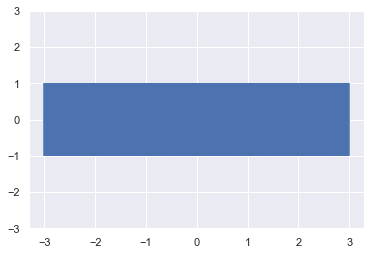

In [119]:
θ = [1, 10]
σ_0 = rbf_kernel(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim((-3,3))

 Since there are no previous points, we can sample from an unconditional Gaussian

In [120]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
print(y)

[-1.1082639643164798]


We can now update our confidence band, given the point that we just sampled, using the covariance function to generate new point-wise intervals, conditional on the value [x_0, y_0].

In [121]:
σ_1 = exponential_cov(x, x, θ)
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, rbf_kernel, θ, σ_1, y) for i in x_pred]

(-3.0, 3.0)

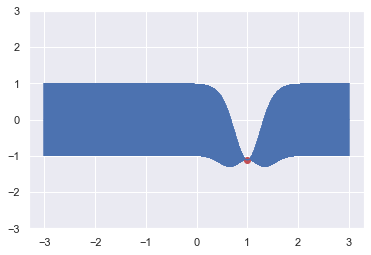

In [122]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim((-3,3))

In [123]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
print(y2)

-0.07708700007403348


In [124]:
x.append(-0.7)
y.append(y2)
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

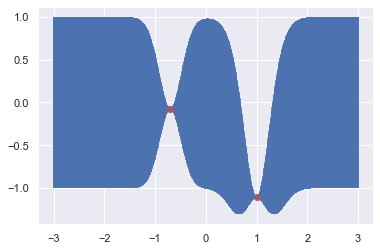

In [125]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [126]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
print(mu)
print(s)
y_more = np.random.multivariate_normal(mu, s)
print(y_more)

[-4.27456487e-06 -3.14221207e-03 -9.61554729e-02 -4.51752801e-02
 -1.44155187e-05]
[[ 9.99999997e-01  1.65296628e-01 -3.73627090e-07  1.19843900e-12
   3.82424663e-16]
 [ 1.65296628e-01  9.98338443e-01 -2.74559569e-04  8.80965650e-10
   2.81118181e-13]
 [-3.73627090e-07 -2.74559569e-04  9.92508018e-01 -3.50450933e-03
  -1.12241541e-06]
 [ 1.19843900e-12  8.80965650e-10 -3.50450933e-03  9.98338443e-01
   8.62930563e-02]
 [ 3.82424663e-16  2.81118181e-13 -1.12241541e-06  8.62930563e-02
   1.00000000e+00]]
[-0.20028442  0.3385526  -1.32485725 -2.01547692 -0.74407041]


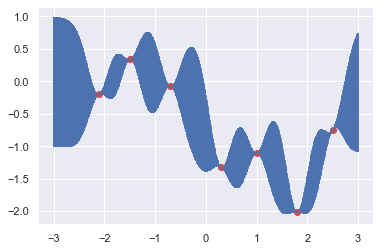

In [127]:
x += x_more
y += y_more.tolist()
σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

Text(0.5, 1.0, 'Search function')

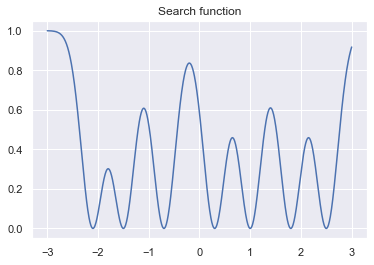

In [128]:
search = np.array(sigmas)
plt.plot(x_pred, search)
plt.title('Search function')

-0.03742369909273591


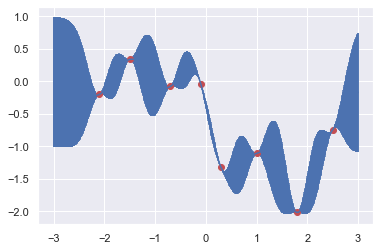

In [129]:
m, s = conditional([-0.1], x, y, θ)
y2 = np.random.normal(m, s)
print(y2)
x.append(-0.1)
y.append(y2)
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

Text(0.5, 1.0, 'Search function')

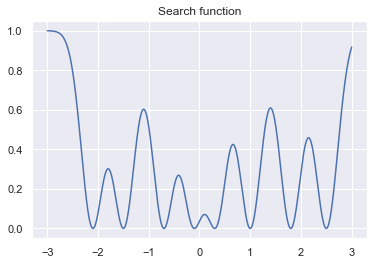

In [130]:
search = np.array(sigmas)
plt.plot(x_pred, search)
plt.title('Search function')

-1.1262098964873486


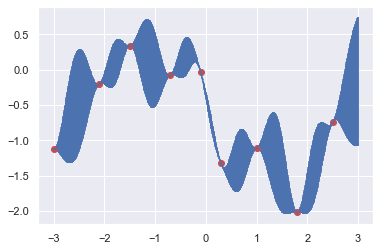

In [131]:
m, s = conditional([-3], x, y, θ)
y2 = np.random.normal(m, s)
print(y2)
x.append(-3)
y.append(y2)
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

Text(0.5, 1.0, 'Search function')

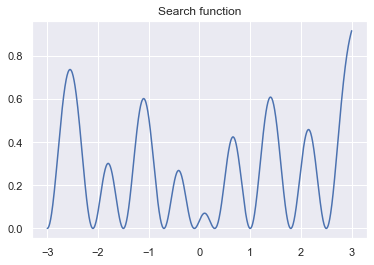

In [132]:
search = np.array(sigmas)
plt.plot(x_pred, search)
plt.title('Search function')